# Predictive Modeling 

In [2]:
cd '/home/jovyan/GA_DSI/Projects/capstone'

/home/jovyan/GA_DSI/Projects/capstone


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import lib.general_utilities as gu

from IPython.display import display
from IPython.display import Image
from sys import getsizeof
import matplotlib.pyplot as plt

processed_dir = 'data/processed_dataset_df/'
data_noEmoji_dir = 'data/pickled/Modelling_NB3_70PercConf_noEmojiEncoding/CrossVal/'
img_noEmoji_dir = 'data/images/Modelling_NB3_70PercConf_noEmojiEncoding/CrossVal/'

data_withEmoji_dir = 'data/pickled/Modelling_NB3_70PercConf_withEmojiEncoding/CrossVal/'
img_withEmoji_dir = 'data/images/Modelling_NB3_70PercConf_withEmojiEncoding/CrossVal/'


%matplotlib inline

2. <b>Modeling</b>
  1. What effects do emojis have on model predictions?
    1. Created model pipelines for data with and without `emoji encoding`.<br>
  2. What effects do different levels of text processing, which is a way of doing<br>
     feature dimensionality reduction, have on model predictions?
    1. Created model pipelines for different levels of text processing.
  3. Used `CountVectorizer` to transform the text data.<br>
     `NOTE`: Can continue to further explore using TfidfVectorizer,<br>
     to see which performs better as a preprocessing step.
  4. Tested out two classifiers: `NaiveBayes` and `Logistic Regression`, using cross validation.
    1. Why did I choose these two classifiers?<br>
       From my understanding both have differnt learning mechanisms:<br>
       <b>Naive Bayes</b>:<br>
       Naive Bayes models the joint distribution (X,Y) and then predicts the<br>
       probability P(y| x) where X is the set of inputs features and Y is the output labels.<br>
       Basically it uses the training data to estimate P(X|Y) and P(Y). It then uses<br>
       these together with bayes rule P(Y|X)=P(X|Y)*P(Y)/P(X), to predict a Y for a<br>
       new X.<br>
       <b>Logistic Regression</b>:<br>
       Logistic regression directly models the P(y|x) from learning the input to output mapping,<br>
       by minimizing the prediction error.
  5. Ran a gridsearch to find the best model for each classifier, by tunning hyper parameters.
    1. Did grid searching improve the results?
  6. Evaluated the classifiers by analyzing the confusion matrix and classification report.
    1. What effects did different dimensionality reduction and preprocessing<br>
       methods have on the results?<br><br>

In [1]:
# Metrics computed from a confusion matrix:

#    Classification Accuracy: Overall, how often is the classifier correct?
#    (TP + TN) / (TP + TN + FP + FN)

#    Classification Error: Overall, how often is the classifier incorrect?
#    (FP + FN) / (TP + TN + FP + FN)

#    Sensitivity: When the actual value is positive, how often is the prediction correct?
#    out of all positives, how many were true positives.
#    ***** This is Something we want to maximize. *****
#           How "sensitive" is the classifier to detecting positive instances?
#           Also known as "True Positive Rate" or "RECALL"
#                 TP / all positive
#                 all positive = TP + FN

#     Specificity: When the actual value is negative, how often is the prediction correct?
#     ***** This is Something we want to maximize. *****
#             How "specific" (or "selective") is the classifier in predicting positive instances?
#                 TN / all negative
#                 all negative = TN + FP

#     Precision: When a positive value is predicted, how often is the prediction correct?
#             How "precise" is the classifier when predicting positive instances?
#.            TP/(TP+FP)

`For more details about my work on this topic refer to:`<br>
[Modelling with no emoji encoding using CV](Modelling_70PercCL_noEmojiEnc_NB1-CV.ipynb) <br>
[Modelling with emoji encoding using CV](Modelling_70PercCL_withEmojiEnc_NB2-CV.ipynb) <br>
[Modelling with emoji encoding using GS](Modelling_70PercCL_withEmojiEnc_NB2-GS.ipynb) <br>

### I used data with and without encoded emojis to see if there is a difference in model performance.

In [34]:
# Load data WITHOUT emojis encoded.
filename = processed_dir+'airline_proc_dataset_70percCL_noEmEnc_df'
noEmEnc_df = gu.read_pickle_obj(filename)
noEmEnc_df[9:12]
# We see emojis are not encoded.

,airline,airline_sentiment,text,clean_text,stopw_clean_text,stem_stopw_clean_text,negativereason,airline_sentiment_confidence
9,Virgin America,negative,@VirginAmerica I flew from NYC to SFO last we...,i flew from nyc to sfo last week and couldnt f...,flew nyc sfo week fully sit seat large gentlem...,flew nyc sfo week fulli sit seat larg gentlema...,Bad Flight,1.0
10,Virgin America,positive,I ❤️ flying @VirginAmerica. ☺️👍,i ❤️ flying ☺️👍,❤️ flying ☺️👍,❤️ fli ☺️👍,NaN,1.0
11,Virgin America,positive,@VirginAmerica you know what would be amazingl...,you know what would be amazingly awesome bosfl...,know amazingly awesome bosfll want fly,know amazingli awesom bosfll want fli,NaN,1.0


In [35]:
# Load data WITH emojis encoded.
filename = processed_dir+'airline_proc_dataset_70percCL_withEmEnc_addLemma_df'
withEmEnc_df = gu.read_pickle_obj(filename)
withEmEnc_df[9:12]
# We see emojis are encoded.

,airline,airline_sentiment,text,clean_text,stopw_clean_text,stem_stopw_clean_text,emojis,negativereason,airline_sentiment_confidence,lemma_stopw_clean_text
9,Virgin America,negative,@VirginAmerica I flew from NYC to SFO last we...,i flew from nyc to sfo last week and couldnt f...,flew nyc sfo week fully sit seat large gentlem...,flew nyc sfo week fulli sit seat larg gentlema...,,Bad Flight,1.0,flew nyc sfo last week couldnt fully sit seat ...
10,Virgin America,positive,I ❤️ flying @VirginAmerica. ☺️👍,i EMOJI_1️ flying EMOJI_2️ EMOJI_3,EMOJI_1️ flying EMOJI_2️ EMOJI_3,emoji_1️ fli emoji_2️ emoji_3,❤ ☺ 👍,NaN,1.0,emoji1️ flying emoji2️ emoji3
11,Virgin America,positive,@VirginAmerica you know what would be amazingl...,you know what would be amazingly awesome bosfl...,know amazingly awesome bosfll want fly,know amazingli awesom bosfll want fli,,NaN,1.0,know would amazingly awesome bosfll please wan...


### Highly imbalanced dataset.
`Note`: I can further explore on how to optimize imbalanced datasets.<br>
For now, I will use all the data from all classes.<br>
Recall that I chose to only use a subset of the original dataset,<br>
where airline sentiment confidence levels >= 0.7

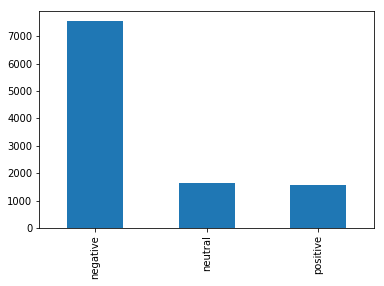

In [8]:
withEmEnc_df.airline_sentiment.value_counts().plot(kind='bar')

### Let's see what is the accuracy that could be achieved by simply always predicting the most frequent class.

In [39]:
y = withEmEnc_df.airline_sentiment
yValCnts = y.value_counts()
yValCnts[0]/sum(yValCnts)

0.70133729569093606

This tells us that if we randomly guessed the predicted value to be 'negative' we would be right 70% of the time.

### Let's encode the target variable using one hot encoding.

In [43]:
# Encode the target categories to a numeric number, using one hot encoding.
encoder = LabelEncoder()
y = encoder.fit_transform(withEmEnc_df['airline_sentiment'])
encoder.classes_

array(['negative', 'neutral', 'positive'], dtype=object)

In [ ]:
# NOTE: Classes encoded as: 'negative' --> 0, 'neutral' --> 1, ''positive' -->2.

## Let's run the data through some models and qualify them. 
### So which models will I choose to test?
I will use `Logistic Regression` and `Naive Bayes`, since they are both differnt from each other.<br>
<b>Learning Mechanisms</b>:<br>
`Naive Bayes`:<br>
Naive Bayes models the joint distribution (X,Y) and then predicting the
probability P(y| x) where X is the set of inputs features and Y is the output labels.
Basically it uses the training data to estimate P(X|Y) and P(Y). It then uses
these together with bayes rule P(Y|X)=P(X|Y)*P(Y)/P(X), to predict a Y for a
new X.<br>
`Logistic Regression`:<br>
Logistic regression directly models the P(y|x) from learning the input to output mapping,
by minimizing the prediction.<br><br>
<b>Model Assumptions</b>:<br>
`Naive Bayes`:<br>
Model assumes all the features are conditionally independent. So,if some of the features are
dependent on each other (in case of a large feature space), the prediction might be poor.<br>
`Logistic regression`:<br>
It splits the feature space linearly, so it works OK even if some of the
variables are correlated.<br><br>
<b>Model limitations</b><br>
`Naive Bayes`:<br>
Due do the way its learns to predict, I am guessing it works fairly well even with less training data,
as the estimates are based on the joint density function.<br>
`Logistic regression`:<br>
With a small training data, the model estimates may over fit the data, causing high variance in the predictions.<br>

<b>1. Used CountVectorizer() as the data transformer, in my modelling pipelines.</b><br>
<b>2. First ran pipelines with naive models and only using unigrams, with cross validation.</b><br>
I used these results to analyze the effects of using emojis as predictors and evaluate model performance           using data with 3 different dimensions.(clean text, adding stopwords, adding stem/lemma)<br>
<b>3. Then I did a gridsearch and tunned the hyper parameter to see if it could improved the models' performance.</b>

## Let's see what effects do emojis have on model predictions?
  1. Created model pipelines for data with and without `emoji encoding`.<br>
  2. What effects do different levels of text processing, which is a way of doing<br>
     feature dimensionality reduction, have on model predictions?
    1. Created model pipelines for different levels of text processing.
  3. Used `CountVectorizer` to transform the text data.<br>
     `NOTE`: Can continue to further explore using TfidfVectorizer,<br>
     to see which performs better as a preprocessing step.

refer to my modelling notebook for this analysis here: 

## Let's look at the model results for data with and without emoji encoding.

In [ ]:
# Following is a sample of how I stored the data. 
# I created a model results dataframe --> to store the model results.
# I created a classification reports dataframe --> to store model metrics.

# A pair of dataframes were created, one with emoji encoding and one without.

In [21]:
# Load model results 
filename = data_noEmoji_dir+'benchmark_model_results_ngrams1_1_df'
noEmEnc_model_results_df = gu.read_pickle_obj(filename)

In [22]:
noEmEnc_model_results_df.head(4)

,dataset,model,tr_acc_score,tst_acc_score,pipe_object,y_pred,ytest,ypred_proba
0,clean text,NaiveBayes,0.818670,0.757203,"Pipeline(steps=[('vec', CountVectorizer(analyz...","[1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, ...","[1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, ...","[[0.276986055823, 0.70136884721, 0.02164509696..."
1,clean text,LogisticRegression,0.841074,0.814769,"Pipeline(steps=[('vec', CountVectorizer(analyz...","[1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 1, 2, 2, 0, ...","[1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, ...","[[0.000141924008874, 0.999842745823, 1.5330167..."
2,remove stopwords,NaiveBayes,0.819714,0.779946,"Pipeline(steps=[('vec', CountVectorizer(analyz...","[1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, ...","[1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, ...","[[0.2546868438, 0.589602028781, 0.155711127419..."
3,remove stopwords,LogisticRegression,0.810656,0.784582,"Pipeline(steps=[('vec', CountVectorizer(analyz...","[1, 0, 2, 0, 0, 1, 0, 2, 0, 0, 2, 1, 2, 2, 0, ...","[1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, ...","[[0.122244915004, 0.87010519278, 0.00764989221..."


In [65]:
# Load model results 
filename = data_withEmoji_dir+'benchmark_model_results_ngrams1_1_df'
EmEnc_model_results_df = gu.read_pickle_obj(filename)
EmEnc_model_results_df.head(4)

,dataset,model,tr_acc_score,tst_acc_score,pipe_object,y_pred,ytest,ypred_proba
0,clean text,NaiveBayes,0.897144,0.818942,"Pipeline(steps=[('encoder', CountVectorizer(an...","[1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, ...","[1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, ...","[[0.285214672448, 0.694994783444, 0.0197905441..."
1,clean text,LogisticRegression,0.999303,0.844475,"Pipeline(steps=[('encoder', CountVectorizer(an...","[1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 1, 2, 2, 0, ...","[1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, ...","[[0.000201519321423, 0.999793825176, 4.6555023..."
2,remove stopwords,NaiveBayes,0.900975,0.823584,"Pipeline(steps=[('encoder', CountVectorizer(an...","[1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, ...","[1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, ...","[[0.257898587889, 0.589837351043, 0.1522640610..."
3,remove stopwords,LogisticRegression,0.997562,0.811978,"Pipeline(steps=[('encoder', CountVectorizer(an...","[1, 0, 2, 0, 0, 1, 0, 2, 0, 0, 2, 1, 0, 2, 0, ...","[1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, ...","[[0.108289542889, 0.883826950076, 0.0078835070..."


In [24]:
# Load classification metrics no emoji enc.
filename = data_noEmoji_dir+'benchmark_class_report_ngrams1_1_df.obj'
noEmEnc_classrep_results_df = gu.read_pickle_obj(filename)
noEmEnc_classrep_results_df.head(6)

,class,f1_score,precision,recall,support,model,data_desc
0,negative,0.89,0.80,0.99,1500.0,NaiveBayes,clean text
1,neutral,0.46,0.87,0.31,350.0,NaiveBayes,clean text
2,positive,0.68,0.90,0.55,304.0,NaiveBayes,clean text
3,negative,0.90,0.90,0.90,1500.0,LogisticRegression,clean text
4,neutral,0.65,0.65,0.65,350.0,LogisticRegression,clean text
5,positive,0.76,0.77,0.76,304.0,LogisticRegression,clean text


In [64]:
# Load classification metrics with emoji enc.
filename = data_withEmoji_dir+'benchmark_class_report_ngrams1_1_df.obj'
EmEnc_classrep_results_df = gu.read_pickle_obj(filename)
EmEnc_classrep_results_df.head(6)

,class,f1_score,precision,recall,support,model,data_desc
0,negative,0.89,0.81,0.99,1500.0,NaiveBayes,clean text
1,neutral,0.46,0.85,0.31,350.0,NaiveBayes,clean text
2,positive,0.70,0.91,0.57,304.0,NaiveBayes,clean text
3,negative,0.90,0.90,0.90,1500.0,LogisticRegression,clean text
4,neutral,0.66,0.65,0.66,350.0,LogisticRegression,clean text
5,positive,0.78,0.78,0.78,304.0,LogisticRegression,clean text


## Visualize Classification Report Metrics.

`To validate my models`, I primarily looked at 3 scores.

<b>Accuracy</b>  : a ratio of correctly predicted observation to the total observations.(TP+TN)/(TP+FP+FN+TN)<br>
<b>Precision</b> : the correctly predicted positive observations to the total predicted positive observations. TP/(TP+FP)<br>
<b>Recall</b>    :  the ratio of correctly predicted positive observations to all the observations in the actual class. TP/(TP+FN)<br>


### Accuracy of model for the different feature dimensions of the text data
```text data: only cleaned, stopwords added, stemming added.```

no emoji enc


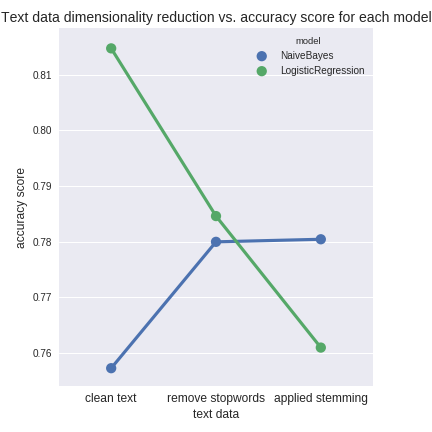

with emoji enc


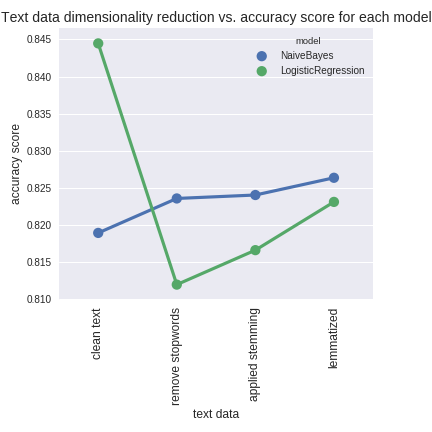

In [4]:
# no emoji
im = Image(filename = img_noEmoji_dir + 'BM_model_accuracy_vs_feat_dim_reduction.png')
print("no emoji enc")
display(im)

# with emoji
im = Image(filename = img_withEmoji_dir + 'BM_model_accuracy_vs_feat_dim_reduction.png')
print("with emoji enc")
display(im)

### Let's look at the classification report metrics: precision and recall, and confusion matrix
```text data: only cleaned, stopwords added, stemming added.```

no emoji enc


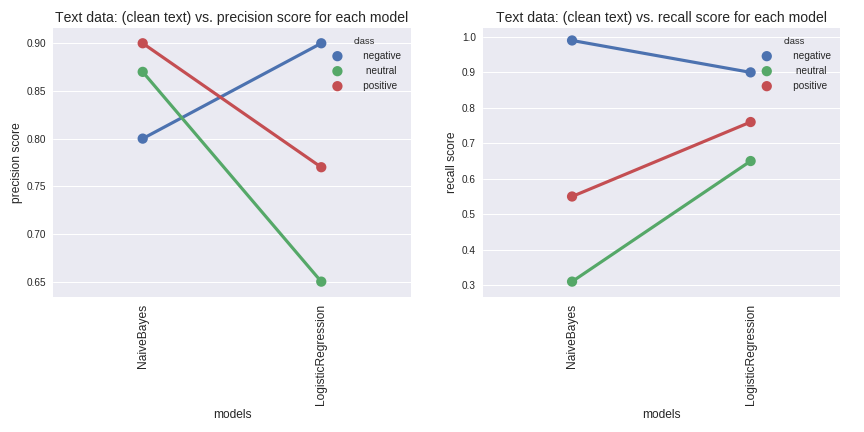


NaiveBayes: Avg Precision/Recall: 0.83  0.82 
LogisticRegression: Avg Precision/Recall: 0.84  0.84



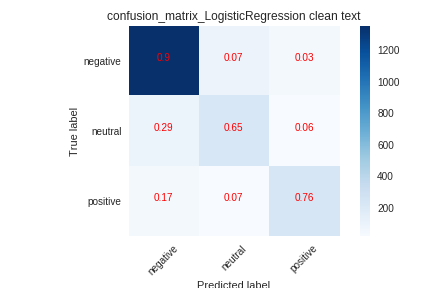

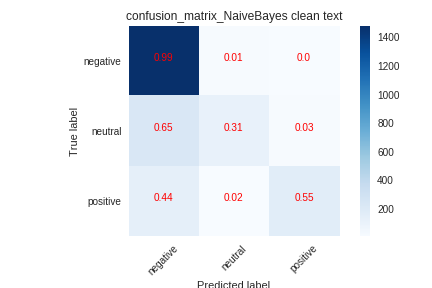

with emoji enc


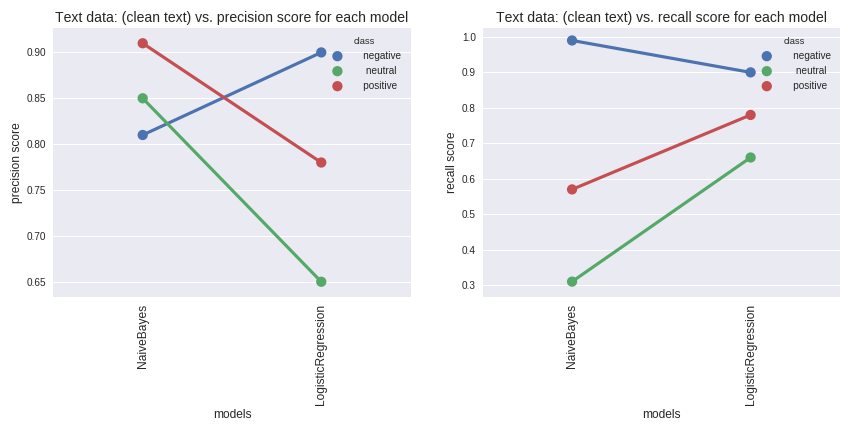


NaiveBayes: Avg Precision/Recall: 0.83  0.82 
LogisticRegression: Avg Precision/Recall: 0.84  0.84



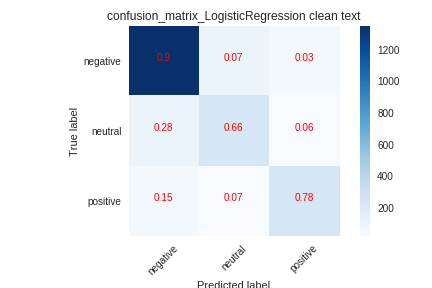

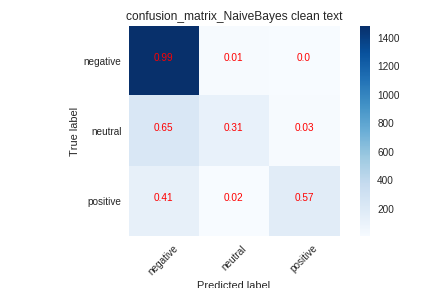

In [6]:
#no emoji clean text
print("no emoji enc")
im = Image(filename = img_noEmoji_dir + 'BM_model_prec_recall_vs_models_cleantext.png')
display(im)
print("\nNaiveBayes: Avg Precision/Recall: 0.83  0.82", 
      "\nLogisticRegression: Avg Precision/Recall: 0.84  0.84\n")
im = Image(filename = img_noEmoji_dir + 'BM_confusion_matrix_LogisticRegression clean text.png')
display(im)
im = Image(filename = img_noEmoji_dir + 'BM_confusion_matrix_NaiveBayes clean text.png')
display(im)
#with emoji clean text
print("with emoji enc")
im = Image(filename = img_withEmoji_dir + 'BM_model_prec_recall_vs_models_cleantext.png')
display(im)
print("\nNaiveBayes: Avg Precision/Recall: 0.83  0.82", 
      "\nLogisticRegression: Avg Precision/Recall: 0.84  0.84\n")
im = Image(filename = img_withEmoji_dir + 'BM_confusion_matrix_LogisticRegression clean text.png')
display(im)
im = Image(filename = img_withEmoji_dir + 'BM_confusion_matrix_NaiveBayes clean text.png')
display(im)

no emoji enc


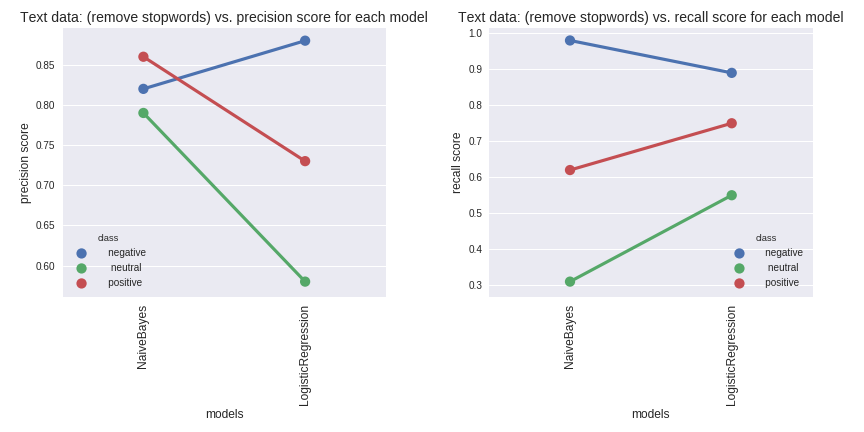


NaiveBayes: Avg Precision/Recall: 0.82  0.82 
LogisticRegression: Avg Precision/Recall: 0.81  0.81



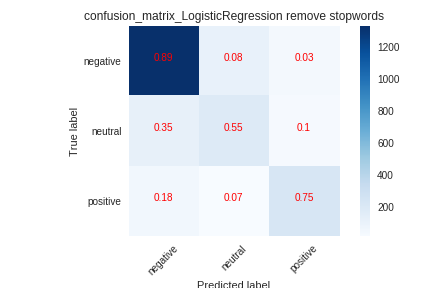

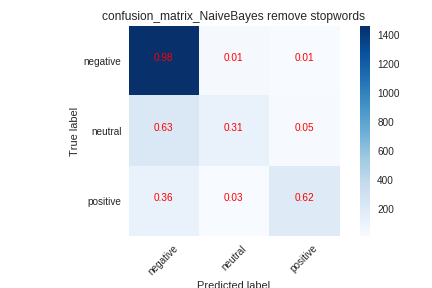

with emoji enc


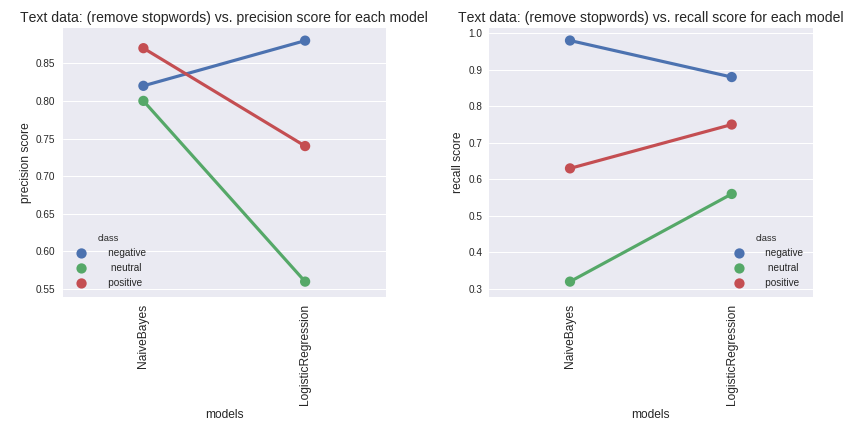


NaiveBayes: Avg Precision/Recall: 0.82  0.82 
LogisticRegression: Avg Precision/Recall: 0.81  0.81



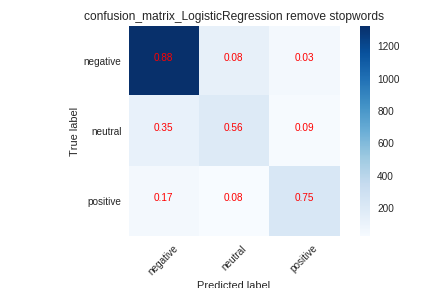

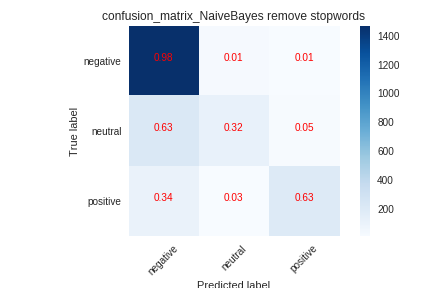

In [7]:
# no emoji enc added stopwords.
print("no emoji enc")
im = Image(filename = img_noEmoji_dir + 'BM_model_prec_recall_vs_models_removestopwords.png')
display(im)
print("\nNaiveBayes: Avg Precision/Recall: 0.82  0.82", 
      "\nLogisticRegression: Avg Precision/Recall: 0.81  0.81\n")
im = Image(filename = img_noEmoji_dir + 'BM_confusion_matrix_LogisticRegression_removestopwords.png')
display(im)
im = Image(filename = img_noEmoji_dir + 'BM_confusion_matrix_NaiveBayes_removestopwords.png')
display(im)
# with emoji enc added stopwords.
print("with emoji enc")
im = Image(filename = img_withEmoji_dir + 'BM_model_prec_recall_vs_models_removestopwords.png')
display(im)
print("\nNaiveBayes: Avg Precision/Recall: 0.82  0.82", 
      "\nLogisticRegression: Avg Precision/Recall: 0.81  0.81\n")
im = Image(filename = img_withEmoji_dir + 'BM_confusion_matrix_LogisticRegression remove stopwords.png')
display(im)
im = Image(filename = img_withEmoji_dir + 'BM_confusion_matrix_NaiveBayes remove stopwords.png')
display(im)

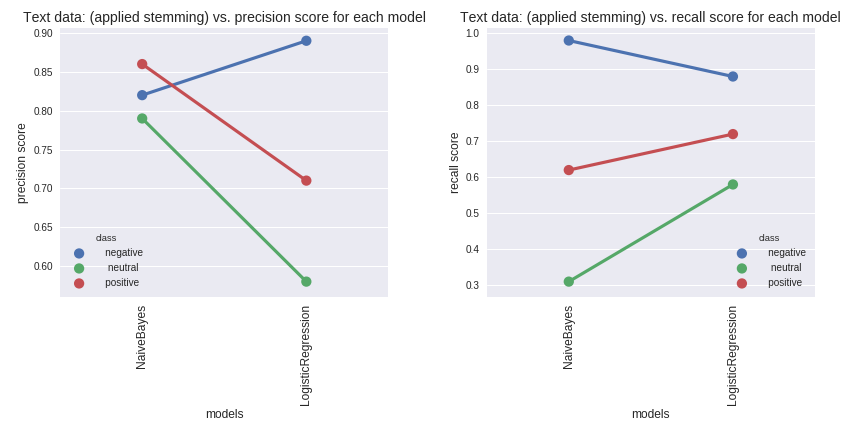


NaiveBayes: Avg Precision/Recall: 0.82  0.82 
LogisticRegression: Avg Precision/Recall: 0.81  0.81



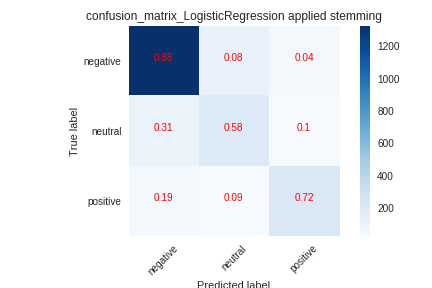

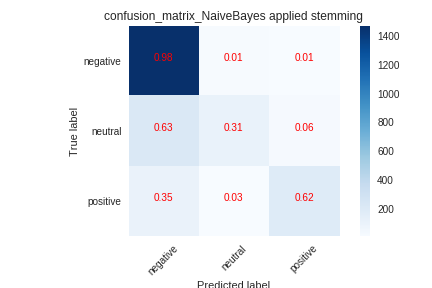

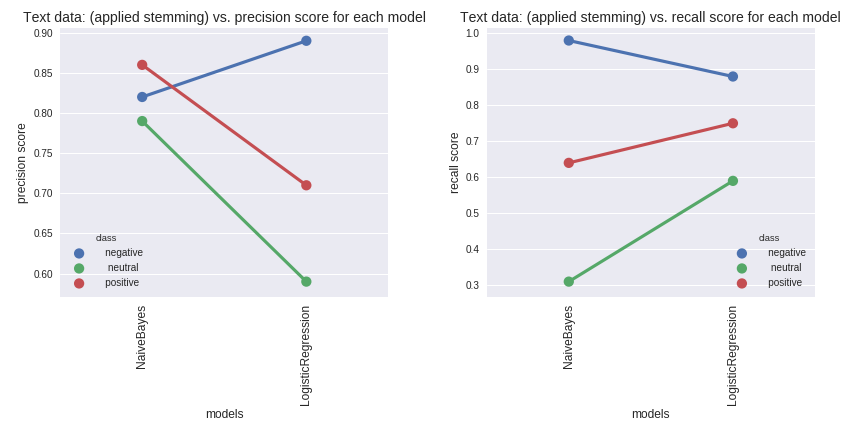


NaiveBayes: Avg Precision/Recall: 0.82  0.82 
LogisticRegression: Avg Precision/Recall: 0.82  0.82



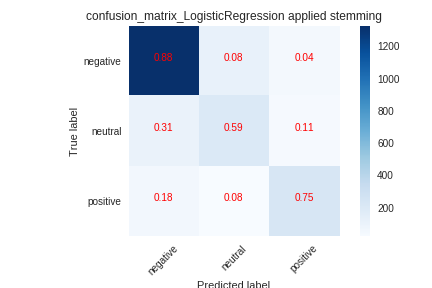

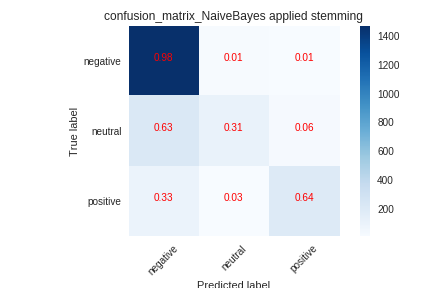

In [8]:
# no emoji enc.
im = Image(filename = img_noEmoji_dir + 'BM_model_prec_recall_vs_models_appliedstemming.png')
display(im)
print("\nNaiveBayes: Avg Precision/Recall: 0.82  0.82", 
      "\nLogisticRegression: Avg Precision/Recall: 0.81  0.81\n")
im = Image(filename = img_noEmoji_dir + 'BM_confusion_matrix_LogisticRegression_appliedstemming.png')
display(im)
im = Image(filename = img_noEmoji_dir + 'BM_confusion_matrix_NaiveBayes_appliedstemming.png')
display(im)

# with emoji enc.
im = Image(filename = img_withEmoji_dir + 'BM_model_prec_recall_vs_models_appliedstemming.png')
display(im)
print("\nNaiveBayes: Avg Precision/Recall: 0.82  0.82", 
      "\nLogisticRegression: Avg Precision/Recall: 0.82  0.82\n")
im = Image(filename = img_withEmoji_dir + 'BM_confusion_matrix_LogisticRegression applied stemming.png')
display(im)
im = Image(filename = img_withEmoji_dir + 'BM_confusion_matrix_NaiveBayes applied stemming.png')
display(im)

`To see the displayed classification reports, refer to:`<br>
[Classification Report Metrics](TP_ClassificationReportMetrics.ipynb) <br>

In [43]:
print('no Emoji Enc\n',
      noEmEnc_model_results_df[['dataset', 'model', 'tr_acc_score', 'tst_acc_score']], 
      '\n\nwith Emoji Enc\n\n',
      EmEnc_model_results_df[['dataset', 'model', 'tr_acc_score', 'tst_acc_score']])

no Emoji Enc
             dataset               model  tr_acc_score  tst_acc_score
0        clean text          NaiveBayes      0.818670       0.757203
1        clean text  LogisticRegression      0.841074       0.814769
2  remove stopwords          NaiveBayes      0.819714       0.779946
3  remove stopwords  LogisticRegression      0.810656       0.784582
4  applied stemming          NaiveBayes      0.813908       0.780409
5  applied stemming  LogisticRegression      0.799511       0.760912 

with Emoji Enc

             dataset               model  tr_acc_score  tst_acc_score
0        clean text          NaiveBayes      0.897144       0.818942
1        clean text  LogisticRegression      0.999303       0.844475
2  remove stopwords          NaiveBayes      0.900975       0.823584
3  remove stopwords  LogisticRegression      0.997562       0.811978
4  applied stemming          NaiveBayes      0.891688       0.824048
5  applied stemming  LogisticRegression      0.996401       0.816620
6

# Observations and Conclusions: 

## Accuracy scores:

`No emoji encoding:`<br>
1. Linear Regression has a linearly decreasing train and test accuracy score, as the feature dimensiionality is reduced.<br>
  2. It seems like it does better with more features. 
  3. It outperforms Naive Bayes with the higher dimension feature space data. 
  4. As seen, with stemming applied to the data, it underperforms compared to Naive Bayes.
2. Naive Bayes seems to actually slightly perform better with feature reduction.<br>
`With emoji encoding:`<br>
1. Both models perform much better! <b>So yes, emojis as features improve model performance in sentiment classification of text!</b>
2. For both models the train and test accuracy scores increased.
3. Interesting observation is that Logostic Regression score also decreses linearly with feature reduction, but it seems to perform better with lemmatized data vs. stemming processed data.
4. Naive Bayes, as earlier, seems to slightly perform better with feature reduction. 

In [47]:
print('no Emoji Enc\n',
      noEmEnc_classrep_results_df[['class', 'data_desc', 'model', 'precision', 'recall']], 
      '\n\nwith Emoji Enc\n\n',
      EmEnc_classrep_results_df[['class', 'data_desc', 'model', 'precision', 'recall']])

no Emoji Enc
           class         data_desc               model  precision  recall
0      negative        clean text          NaiveBayes       0.80    0.99
1       neutral        clean text          NaiveBayes       0.87    0.31
2      positive        clean text          NaiveBayes       0.90    0.55
3      negative        clean text  LogisticRegression       0.90    0.90
4       neutral        clean text  LogisticRegression       0.65    0.65
5      positive        clean text  LogisticRegression       0.77    0.76
6      negative  remove stopwords          NaiveBayes       0.82    0.98
7       neutral  remove stopwords          NaiveBayes       0.79    0.31
8      positive  remove stopwords          NaiveBayes       0.86    0.62
9      negative  remove stopwords  LogisticRegression       0.88    0.89
10      neutral  remove stopwords  LogisticRegression       0.58    0.55
11     positive  remove stopwords  LogisticRegression       0.73    0.75
12     negative  applied stemming    

In [9]:
# No emoji enc.
print("No emoji Encoding\n")
print("CleanText:\n\nNaiveBayes: Avg Precision/Recall: 0.83  0.82", 
      "\nLogisticRegression: Avg Precision/Recall: 0.84  0.84\n")
print("Stopwords:\n\nNaiveBayes: Avg Precision/Recall: 0.82  0.82", 
      "\nLogisticRegression: Avg Precision/Recall: 0.81  0.81\n")
print("Stemming:\n\nNaiveBayes: Avg Precision/Recall: 0.82  0.82", 
      "\nLogisticRegression: Avg Precision/Recall: 0.81  0.81\n\n")

# With emoji enc.
print("With emoji Encoding\n")
print("CleanText:\n\nNaiveBayes: Avg Precision/Recall: 0.83  0.82", 
      "\nLogisticRegression: Avg Precision/Recall: 0.84  0.84\n")
print("Stopwords:\n\nNaiveBayes: Avg Precision/Recall: 0.82  0.82", 
      "\nLogisticRegression: Avg Precision/Recall: 0.81  0.81\n")
print("Stemming:\n\nNaiveBayes: Avg Precision/Recall: 0.82  0.82", 
      "\nLogisticRegression: Avg Precision/Recall: 0.82  0.82\n")

No emoji Encoding

CleanText:

NaiveBayes: Avg Precision/Recall: 0.83  0.82 
LogisticRegression: Avg Precision/Recall: 0.84  0.84

Stopwords:

NaiveBayes: Avg Precision/Recall: 0.82  0.82 
LogisticRegression: Avg Precision/Recall: 0.81  0.81

Stemming:

NaiveBayes: Avg Precision/Recall: 0.82  0.82 
LogisticRegression: Avg Precision/Recall: 0.81  0.81


With emoji Encoding

CleanText:

NaiveBayes: Avg Precision/Recall: 0.83  0.82 
LogisticRegression: Avg Precision/Recall: 0.84  0.84

Stopwords:

NaiveBayes: Avg Precision/Recall: 0.82  0.82 
LogisticRegression: Avg Precision/Recall: 0.81  0.81

Stemming:

NaiveBayes: Avg Precision/Recall: 0.82  0.82 
LogisticRegression: Avg Precision/Recall: 0.82  0.82



## Precision/Recall scores

1. Looking at the avg precision/recall scores for both models, for all dimensions of data,<br> 
   I infer that `emojis and feature dimension reduction`, have `minimal` or `no effect` on their
   `precision and recall rate`.
2. Inspecting the `indivual classes precision/recall rate` I see that Logistic Regression's recall score 
   is better than Naive Bayes' for the `neutral` and `positive` classes.  
3. However, for the most common class, `negative`, Naive Bayes seems to have a recall rate 10% higher than
   Logistic Regression.

## Now let's see if grid searching and tunning the model hyper parameters increase model performance. 

### For this part I use data with emojis encoded, since it enhances model performance.

In [58]:
data_withEmoji_dir = 'data/pickled/Modelling_NB3_70PercConf_withEmojiEncoding/GridSearch/'
img_withEmoji_dir = 'data/images/Modelling_NB3_70PercConf_withEmojiEncoding/GridSearch/'

# Load gridsearch results.
filename = data_withEmoji_dir+'benchmark_model_results_df'
EmEnc_model_results_gs_df = gu.read_pickle_obj(filename)
EmEnc_model_results_gs_df.head(2)

,dataset,model,tr_acc_score,tst_acc_score,pipe_object,y_pred,ytest,ypred_proba
0,clean text,NaiveBayes,0.927792,0.868617,"GridSearchCV(cv=5, error_score='raise',\n ...","[1, 1, 2, 0, 1, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, ...","[1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, ...","[[1.81462534628e-08, 0.999999962973, 1.8880464..."
1,clean text,LogisticRegression,0.977362,0.886258,"GridSearchCV(cv=5, error_score='raise',\n ...","[1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 0, ...","[1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, ...","[[0.0511412172318, 0.946382596422, 0.002476186..."


In [59]:
# Load classification metrics with emoji enc.
filename = data_withEmoji_dir+'benchmark_class_report_df.obj'
EmEnc_classrep_gs_results_df = gu.read_pickle_obj(filename)
EmEnc_classrep_gs_results_df.head(2)

,class,f1_score,precision,recall,support,model,data_desc
0,negative,0.92,0.90,0.94,1500.0,NaiveBayes,clean text
1,neutral,0.67,0.76,0.60,350.0,NaiveBayes,clean text


In [69]:
print('GridSearched:\n', 
      EmEnc_model_results_gs_df[['dataset', 'model', 'tr_acc_score', 'tst_acc_score']],
      '\nCrossValidated:\n',
      EmEnc_model_results_df[['dataset', 'model', 'tr_acc_score', 'tst_acc_score']])

GridSearched:
             dataset               model  tr_acc_score  tst_acc_score
0        clean text          NaiveBayes      0.927792       0.868617
1        clean text  LogisticRegression      0.977362       0.886258
2  remove stopwords          NaiveBayes      0.890527       0.830548
3  remove stopwords  LogisticRegression      0.922568       0.850975
4  applied stemming          NaiveBayes      0.869631       0.831012
5  applied stemming  LogisticRegression      0.923264       0.857939
6        lemmatized          NaiveBayes      0.902020       0.850046
7        lemmatized  LogisticRegression      0.936731       0.864438 
CrossValidated:
             dataset               model  tr_acc_score  tst_acc_score
0        clean text          NaiveBayes      0.897144       0.818942
1        clean text  LogisticRegression      0.999303       0.844475
2  remove stopwords          NaiveBayes      0.900975       0.823584
3  remove stopwords  LogisticRegression      0.997562       0.811978
4

## Observations:<br> 
The model accuracies improve, for both models.<br>
<b>For clean text:</b><br>
Logistic Regression accuracy improves from .844 to .886.<br>
Naive Bayes accuracy improves from .819 to .869<br>
<b>For removed stopwords text:</b><br>
Logistic Regression accuracy improves from .812 to .851.<br>
Naive Bayes accuracy improves from .824 to .831<br>
<b>For stemmed text:</b><br>
Logistic Regression accuracy improves from .816 to .858.<br>
Naive Bayes accuracy improves from .826 to .850<br><br>

<b>Logistic Regression outperforms Naive Bayes in model accuracy.<b>


`NOTE`: When there are unbalanced classes in a dataset, guessing the more common class will often yield very high accuracy. We noted this to be 0.7 above. For this reason, I beleive you usually want to use different metrics that are less sensitive to imbalance when evaluating the predictive performance of classifiers.

Need to explore f1-score, which seems to combine precision and recall.
F1 = (2 x recall x precision) / (recall + precision)
It seems like the F1 score tends to favor classifiers that are strong in both precision and recall, rather than classifiers that emphasize one at the cost of the other.

I need to understand this better.

### Let's classify some pulled tweets, from major US airlines.
NOTE: Tweets were pulled using filtering #airlinename.

In [134]:
#!pip install emoji

In [85]:
import emoji

In [121]:
# read in pickled emoji dictionary I created from emojis in the dataset. I want to use
# each emoji as an individual feature.
file = 'data/pickled/Emoticon_NB4/full_emoji_dict.obj'
emoji_dict = gu.read_pickle_obj(file)

In [127]:
def encode_emojis(text):
    input_txt = text
    for em in text:
        if em in emoji.UNICODE_EMOJI:
            try:
                input_txt = input_txt.replace(em, emoji_dict[em])
            except:
                # update dict.
                cnt = len(emoji_dict.keys())
                cnt+=1
                val='EMOJI_'+str(cnt)
                emoji_dict[em]=val
                input_txt = input_txt.replace(em, val)
                
    return(input_txt)

In [88]:
def extract_emojis(text):
    return(' '.join(word for word in text if word in emoji.UNICODE_EMOJI))

In [89]:
def declump_emojis_in_text(text):
    em_txt = text        
    for i in text:
        if (i in emoji.UNICODE_EMOJI):
            em_txt = em_txt.replace(i,' '+i)
        
    return(em_txt)

### Lemmatized the tweets for LDA analysis. So read pickle dataframe for pulled tweets. 
```Still need to encode emojis.```

In [128]:
filename = processed_dir+'pulledTweetsCleanedLemma_df'
pulledTweets_df = gu.read_pickle_obj(filename)
pulledTweets_df.head(3)

,date,text,clean_text,lemma_stopw_clean_text
4,2017-12-13 18:59:51,This is amazing. I am so happy! 12 global up...,this is amazing i am so happy 12 global upgrad...,amazing happy 12 global upgrade use next year ...
5,2017-12-13 18:53:36,@united YESSSSSSSSSSSSSSSSSSSSSSSSSSS! I don'...,yesssssssssssssssssssssssssss i dont know how ...,yes dont know today get better amazing thankyo...
6,2017-12-13 18:39:43,RT @ARIELnolastname: First US carrier since Pa...,rt first us carrier since pan am to fly nonsto...,rt first u carrier since pan fly nonstop tahit...


In [129]:
# right now ☺️👍 will be a feature. I want features independent 
# as ☺️ and 👍. Let's declump them.
pulledTweets_df['clean_text'] = pulledTweets_df['clean_text'].apply(declump_emojis_in_text)
# Now let's encode the emojis so we can use it in the vectorizer as a feature.
pulledTweets_df['clean_text'] = pulledTweets_df['clean_text'].apply(encode_emojis)
pulledTweets_df['lemma_stopw_clean_text'] = pulledTweets_df['lemma_stopw_clean_text'].apply(declump_emojis_in_text)
# Now let's encode the emojis so we can use it in the vectorizer as a feature.
pulledTweets_df['lemma_stopw_clean_text'] = pulledTweets_df['lemma_stopw_clean_text'].apply(encode_emojis)
# create a new category 'emojis' with emojis.
pulledTweets_df['emojis'] = pulledTweets_df['text'].apply(extract_emojis)

In [133]:
pulledTweets_df[pulledTweets_df.emojis!=''].values[101:105]

array([[datetime.datetime(2017, 12, 5, 11, 8, 8),
        'American Airlines Is Putting A Ban On Some Smart Luggage 😲\n\nRead more: https://t.co/eJwuex3cWT\n\n#AmericanAirlines #USANews https://t.co/hxeeVIoArO',
        'american airlines is putting a ban on some smart luggage  EMOJI_115 read more americanairlines usanews',
        'american airline putting ban smart luggage  EMOJI_115 read americanairlines usanews',
        '😲'],
       [datetime.datetime(2017, 12, 5, 11, 0, 52),
        'American Airlines Is Putting a Ban on Some Smart Luggage 😮\n\nRead more: https://t.co/q3e6zbmvK9\n\n#AmericanAirlines #USANews https://t.co/gJq5JFk4Qq',
        'american airlines is putting a ban on some smart luggage  EMOJI_114 read more americanairlines usanews',
        'american airline putting ban smart luggage  EMOJI_114 read americanairlines usanews',
        '😮'],
       [datetime.datetime(2017, 12, 5, 3, 22, 11),
        'When baggage claim puts your suitcase on the wrong flight🙃 fucking co

In [136]:
# Update emoji dict. Eventually unicode-escape this.
file = 'data/pickled/Emoticon_NB4/full_emoji_dict.obj'
gu.pickle_obj(file, emoji_dict)

In [138]:
# pickle emoji encoded pulled data.
filename = processed_dir+'pulledTweetsCleanedLemmaEmEnc_df'
gu.pickle_obj(filename,pulledTweets_df)

In [145]:
EmEnc_model_results_gs_df[EmEnc_model_results_gs_df.dataset=='lemmatized']

,dataset,model,tr_acc_score,tst_acc_score,pipe_object,y_pred,ytest,ypred_proba
6,lemmatized,NaiveBayes,0.902020,0.850046,"GridSearchCV(cv=5, error_score='raise',\n ...","[1, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, ...","[1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, ...","[[0.0691840852212, 0.774504066889, 0.156311847..."
7,lemmatized,LogisticRegression,0.936731,0.864438,"GridSearchCV(cv=5, error_score='raise',\n ...","[1, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, ...","[1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, ...","[[0.180051121496, 0.759980075461, 0.0599688030..."


### Use best models found for lemmatized data.

In [166]:
pipe_nb  =EmEnc_model_results_gs_df.get_value(6, 'pipe_object')
pipe_lr = EmEnc_model_results_gs_df.get_value(7, 'pipe_object')

# pickle models.
file1 = processed_dir+'pipe_nb_lemma.obj'
file2 = processed_dir+'pipe_lr_lemma.obj'
gu.pickle_obj(file1, pipe_nb)
gu.pickle_obj(file2, pipe_lr)

In [148]:
pipe_nb.best_params_, pipe_lr.best_params_

({'model__alpha': 0.10000000000000001,
  'vec__max_df': 0.95,
  'vec__min_df': 5,
  'vec__ngram_range': (1, 2)},
 {'model__C': 1.0,
  'vec__max_df': 0.95,
  'vec__min_df': 5,
  'vec__ngram_range': (1, 2)})

In [154]:
classes = {0:'negative', 1:'neutral', 2:'positive'}

In [172]:
# Naive Bayes
y_pred = pipe_nb.predict(pulledTweets_df.lemma_stopw_clean_text)
y_proba = pipe_nb.predict_proba(pulledTweets_df.lemma_stopw_clean_text)

pulledTweets_df['sentiment_predicted_nb']=[classes[y_pred[i]] for i in range(len(y_pred))]

In [173]:
# Logistic Regression.
y_pred = pipe_lr.predict(pulledTweets_df.lemma_stopw_clean_text)
y_proba = pipe_lr.predict_proba(pulledTweets_df.lemma_stopw_clean_text)

pulledTweets_df['sentiment_predicted_lr']=[classes[y_pred[i]] for i in range(len(y_pred))]

In [175]:
pulledTweets_df[['text', 'sentiment_predicted_nb', 'sentiment_predicted_lr', 'emojis']][:5]

,text,sentiment_predicted_nb,sentiment_predicted_lr,emojis
4,This is amazing. I am so happy! 12 global up...,positive,positive,
5,@united YESSSSSSSSSSSSSSSSSSSSSSSSSSS! I don'...,positive,positive,
6,RT @ARIELnolastname: First US carrier since Pa...,neutral,negative,🌺 🌏 🌊 🌞
7,Being nagged over and over and over about bag ...,negative,negative,
8,Wow - don’t fly business with #UnitedAirlines....,negative,negative,


### Let's look at the predictions.

In [178]:
for i in range(50):
    print('Tweet:\n', pulledTweets_df.text.values[i], 
          '\nSentiment Prediction NB:\n', pulledTweets_df.sentiment_predicted_nb.values[i],
          '\nSentiment Prediction LR:\n', pulledTweets_df.sentiment_predicted_lr.values[i],
          '\n')

Tweet:
 This is amazing.  I am so happy!  12 global upgrades to use next year, Tahiti, here we come....again! #United #UnitedAirlines #StarAlliance https://t.co/fMMs7UPz1z 
Sentiment Prediction NB:
 positive 
Sentiment Prediction LR:
 positive 

Tweet:
 @united YESSSSSSSSSSSSSSSSSSSSSSSSSSS!  I don't know how today can get any better, this is amazing!  #ThankYou #UnitedAirlines #FlyingTheTahitiSkies 
Sentiment Prediction NB:
 positive 
Sentiment Prediction LR:
 positive 

Tweet:
 RT @ARIELnolastname: First US carrier since Pan Am to fly non-stop to Tahiti...it’s Lit. 🌺🌏🌊🌞 #unitedairlines #Tahiti #paradise 
Sentiment Prediction NB:
 neutral 
Sentiment Prediction LR:
 negative 

Tweet:
 Being nagged over and over and over about bag stowage during boarding is horrible and I'm sure largely pointless. Shut up #UnitedAirlines 
Sentiment Prediction NB:
 negative 
Sentiment Prediction LR:
 negative 

Tweet:
 Wow - don’t fly business with #UnitedAirlines.  Apparently domestic upper and business

## Observations: 
Text classification can be very challenging, due to high levels of ambiguity.<br>
Then add to that the erratic language used by tweeters and that just makes it harder.<br>
Then the issue of training data to train a model arises. Most often we have data with no labels, which makes supervised learning for this kind of data challenging.

This leads to my next exploration... unsupervised learning - Topic Modelling using LDA model.

## [Next Notebook: LDA Topic Modeling](4_TechnicalP_LDA.ipynb) 